In [1]:
import numpy as np
import pandas as pd
import os

languages = [
    'Spanish',
    'English',
    'German',
    'French'
]

file_directory = os.getcwd()
extractedFeatures_folder = 'ExtractedFeatures/'

df_full = pd.DataFrame()
for language in languages:
    df_language = pd.read_csv(file_directory + '/' + extractedFeatures_folder + '/' + language + '.csv', delimiter=";", encoding='utf-8')
    df_language['Class'] = language
    df_full = pd.concat([df_full, df_language], ignore_index=True)
    df_full = df_full.reindex(range(df_full.shape[0]))

X = df_full.drop(['phrase', 'Class'], axis=1)
y = df_full['Class']

In [2]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

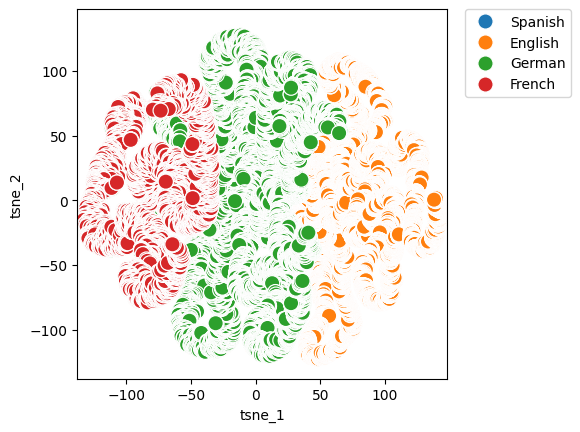

In [7]:



n_components = 2
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(X)
tsne_result.shape
# (1000, 2)
# Two dimensions for each of our images
 
# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})


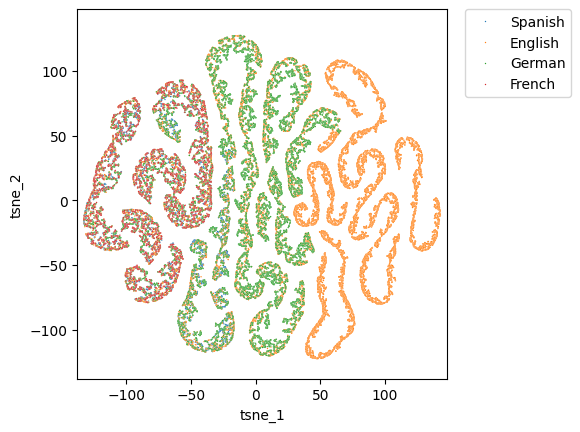

In [10]:
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=1)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [4]:
train = StandardScaler().fit_transform(x_train)
test = StandardScaler().fit_transform(x_test)

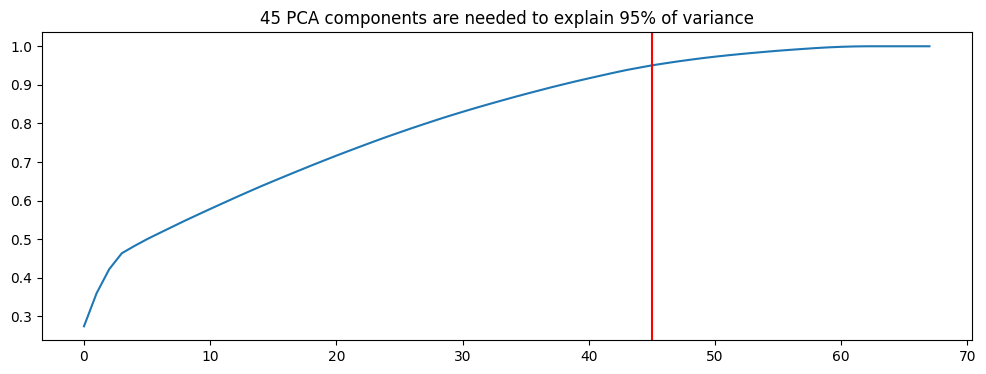

In [5]:
from sklearn.decomposition import PCA

pca_full = PCA(n_components=x_test.shape[1])
pca_full.fit(train)

cummulative_variance = pca_full.explained_variance_ratio_.cumsum()

# Find number of components needed to explain 95% of variance:
ind= np.argwhere(cummulative_variance>0.95)
Ncomponents_95 = ind[0].item()

fig = plt.figure(figsize=(12,4))
plt.plot(cummulative_variance)
plt.axvline(Ncomponents_95,c='r')
plt.title('{} PCA components are needed to explain 95% of variance'.format(Ncomponents_95))
plt.show()

In [6]:
pca95 = PCA(n_components=Ncomponents_95)
pca95_proj = pca95.fit_transform(train)

In [7]:
n_components95 = 2
tsne95 = TSNE(n_components95)
tsne_result95 = tsne95.fit_transform(pca95_proj)
tsne_result_df_95 = pd.DataFrame({'tsne_1': tsne_result95[:,0], 'tsne_2': tsne_result95[:,1], 'label': y_train})

<AxesSubplot:xlabel='tsne_1', ylabel='tsne_2'>

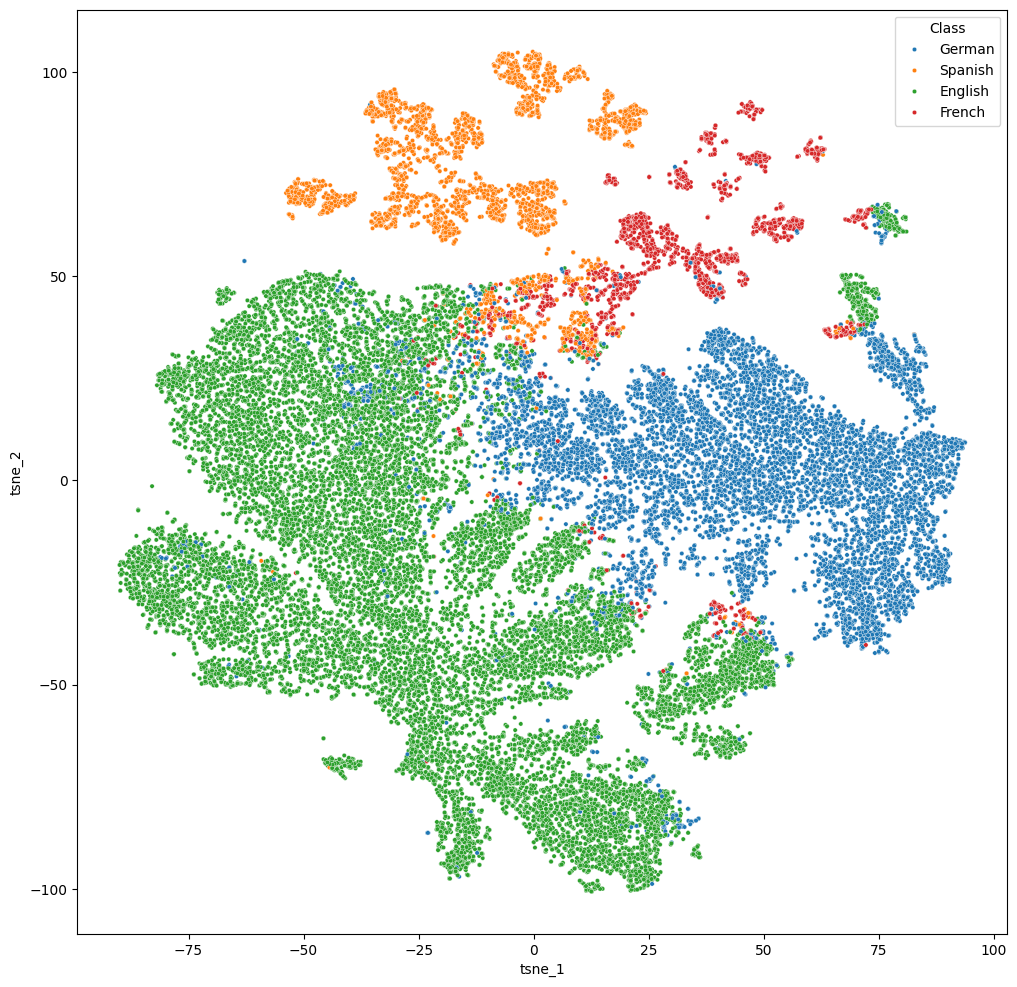

In [8]:
fig = plt.figure(figsize=(12,12))
sns.scatterplot(x='tsne_1', y='tsne_2', data=tsne_result_df_95, hue = y_train, legend = 'full', s=10)


In [9]:
y_test_pred = tsne95.predict(test)

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_test_pred)

fig = plt.figure(figsize=(10, 10))

sns.heatmap(cm,annot = True,fmt = ".0f")
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title('T-SNE 95%')
     

AttributeError: 'TSNE' object has no attribute 'predict'

In [ ]:
import umap
import pickle

mapper = umap.UMAP().fit(train) # create the UMAP mapper
embedding = mapper.transform(train) # project data

In [ ]:
import seaborn as sns
sns.scatterplot(x = embedding[:,0], y = embedding[:,1], hue = y_train, legend = 'full')

In [ ]:
import matplotlib.pyplot as plt

corners = np.array([
    [0, 2],  # bottom left corner
    [15, 2],  # bottom right
    [0, 15],  # top left
    [15, 15],  # top right
])

test_pts = np.array([
    (corners[0]*(1-x) + corners[1]*x)*(1-y) +
    (corners[2]*(1-x) + corners[3]*x)*y
    for y in np.linspace(0, 1, 10)
    for x in np.linspace(0, 1, 10)
])
     

inv_transformed_points = mapper.inverse_transform(test_pts)
     

from matplotlib.gridspec import GridSpec

# Set up the grid
fig = plt.figure(figsize=(15,10))
gs = GridSpec(10, 20, fig)
scatter_ax = fig.add_subplot(gs[:, :10])
digit_axes = np.zeros((10, 10), dtype=object)
#for i in range(10):
#    for j in range(10):
#        digit_axes[i, j] = fig.add_subplot(gs[i, 10 + j])
        
color = [
    'b',
    'r',
    'g',
    'y'
]

# Use umap.plot to plot to the major axis
# umap.plot.points(mapper, labels=labels, ax=scatter_ax)
scatter_ax.scatter(mapper.embedding_[:, 0], mapper.embedding_[:, 1], c=list(map(lambda lan: color[languages.index(lan)], y_train)), cmap='Spectral', s=0.1)
scatter_ax.set(xticks=[], yticks=[])

# Plot the locations of the text points
# scatter_ax.scatter(test_pts[:, 0], test_pts[:, 1], marker='x', c='k', s=15)

# Plot each of the generated digit images
# for i in range(10):
#     for j in range(10):
#         digit_axes[i, j].imshow(inv_transformed_points[i*10 + j].reshape(28, 28))
#         digit_axes[i, j].set(xticks=[], yticks=[])
